In [31]:
import os
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display

In [32]:
my_dir='./cats_dogs/'

In [33]:
def show_playAudio(path):
    y, sr = librosa.load(path, sr=None)
    plt.figure(figsize=(10,5))
    librosa.display.waveshow(y, sr=sr)
    plt.show()
    print(y,sr)
    return Audio(y, rate=sr)

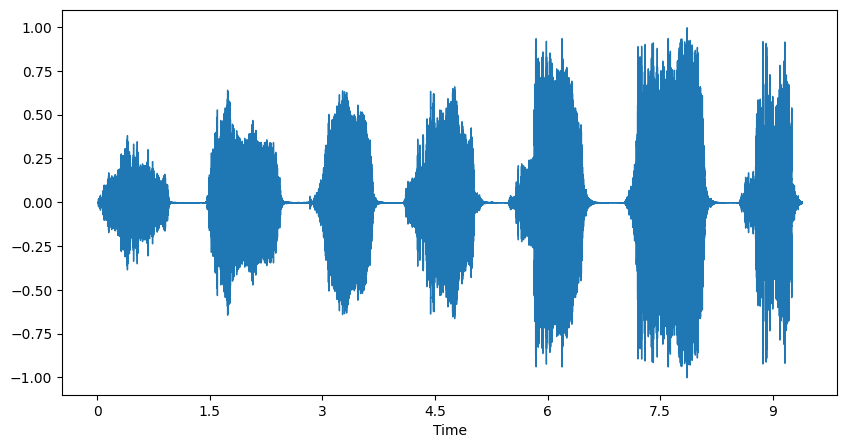

[-0.00024414  0.          0.00012207 ...  0.00280762 -0.00018311
 -0.00219727] 16000


In [34]:
show_playAudio('./cats_dogs/train/cat/cat_10.wav') 

In [35]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
 
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    
   
    mfccs_mean = np.mean(mfccs, axis=1)
    spectral_centroid_mean = np.mean(spectral_centroid)
    rms_mean = np.mean(rms)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    chroma_mean = np.mean(chroma, axis=1)
    beats_count = len(beats)
    
    
    features = np.hstack([
        mfccs_mean, 
        spectral_centroid_mean, 
        rms_mean, 
        zero_crossing_rate_mean, 
        tempo, 
        beats_count, 
        chroma_mean
    ])
    
    return features


In [36]:
classes=os.listdir(my_dir+"/train/")
classes

['cat', 'dog']

In [37]:
feature_list = []
label_list = []
    
for label in classes:
        class_dir = os.path.join('./cats_dogs/train', label)
        for file_name in tqdm(os.listdir(class_dir)):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_dir, file_name)
                features = extract_features(file_path)
                feature_list.append(features)
                label_list.append(label)
    
x_train = np.array(feature_list)
y_train = np.array(label_list)

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:04<00:00, 18.57it/s]


In [38]:
feature_list = []
label_list = []
    
for label in classes:
        class_dir = os.path.join('./cats_dogs/test', label)
        for file_name in tqdm(os.listdir(class_dir)):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_dir, file_name)
                features = extract_features(file_path)
                feature_list.append(features)
                label_list.append(label)
    
x_test = np.array(feature_list)
y_test = np.array(label_list)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 26.62it/s]


In [39]:
x_test[0].shape

(30,)

In [40]:
from sklearn.svm import SVC
model=SVC()


In [41]:
model.fit(x_train,y_train)

SVC()

In [42]:
model.score(x_test,y_test)

0.8059701492537313

In [43]:
y_pred=model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cat       0.81      0.87      0.84        39
         dog       0.80      0.71      0.75        28

    accuracy                           0.81        67
   macro avg       0.80      0.79      0.80        67
weighted avg       0.81      0.81      0.80        67



In [46]:
confusion_matrix(y_test, y_pred)

array([[34,  5],
       [ 8, 20]], dtype=int64)

In [47]:
def getPred(path):
    features = extract_features(path)
    ans=model.predict([features])
    print(ans[0])

cat


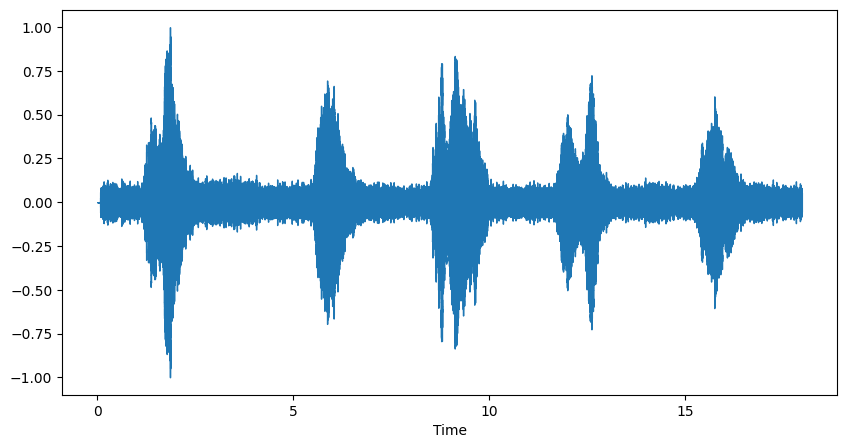

[0.         0.         0.         ... 0.02816772 0.01275635 0.00335693] 16000


In [48]:
sample1="./cats_dogs/test/cat/cat_112.wav"
getPred(sample1)
show_playAudio(sample1)

cat


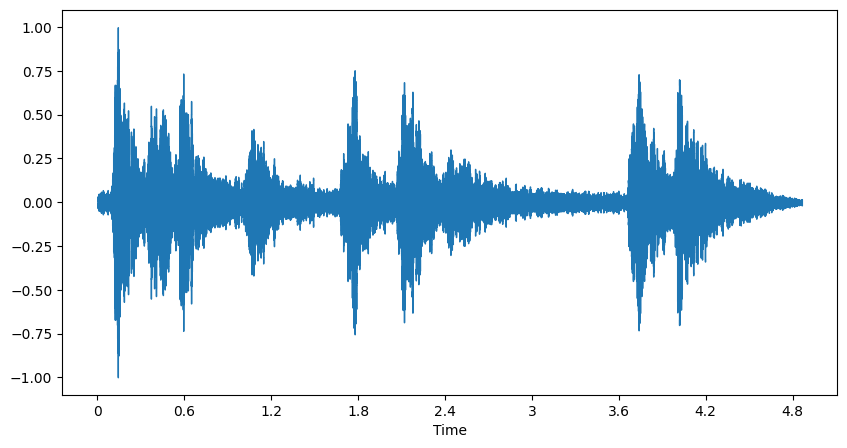

[ 0.00949097  0.00363159  0.00238037 ...  0.0032959  -0.00311279
 -0.00656128] 16000


In [49]:
sample2="./cats_dogs/test/dog/dog_barking_112.wav"
getPred(sample2)
show_playAudio(sample2)

dog


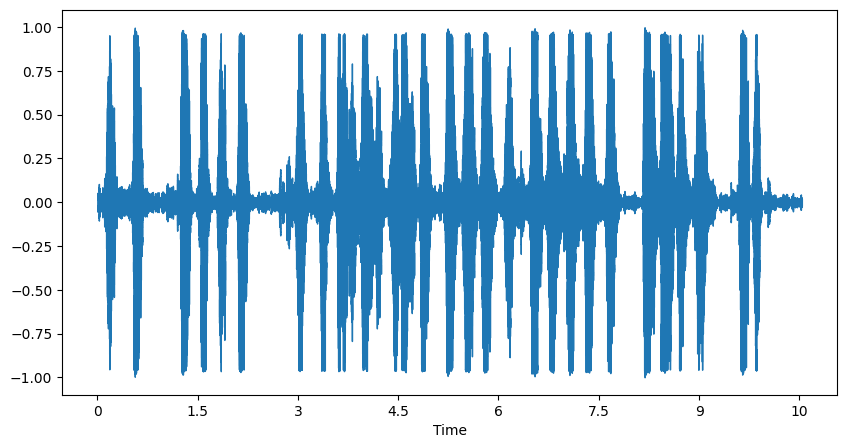

[-0.00054932 -0.00192261 -0.00463867 ...  0.0112915   0.01248169
  0.01034546] 16000


In [50]:
sample3="./cats_dogs/test/dog/dog_barking_99.wav"
getPred(sample3)
show_playAudio(sample3)

cat


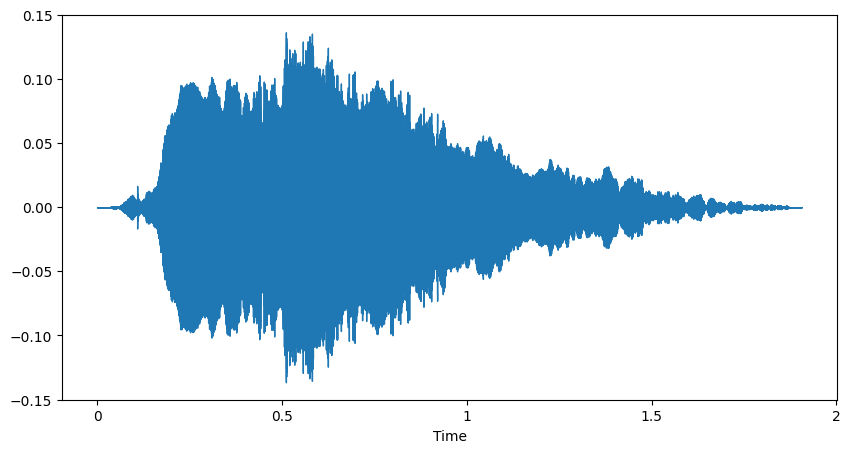

[0.0000000e+00 2.6348595e-14 7.2714899e-15 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] 44100


In [51]:
sample_man1="./cats_dogs/cat-meow-14536.mp3"
getPred(sample_man1)
show_playAudio(sample_man1)

dog


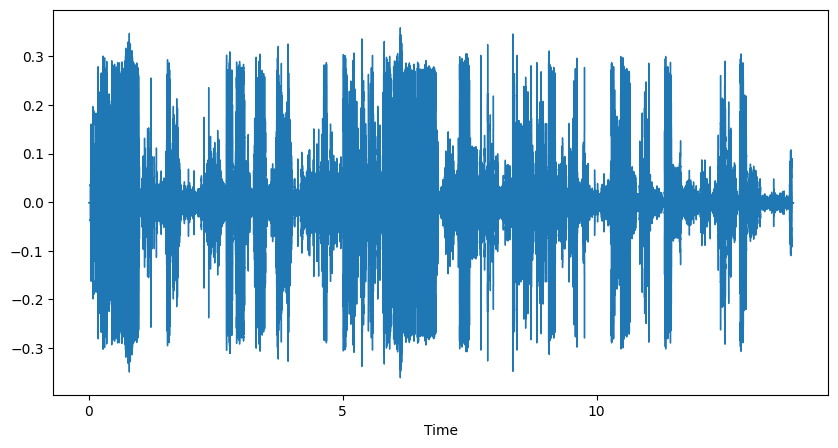

[ 0.0000000e+00  2.2765331e-12 -4.1028292e-13 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] 48000


In [52]:
sample_man2="./cats_dogs/angry-dog-14473.mp3"
getPred(sample_man2)
show_playAudio(sample_man2)

cat


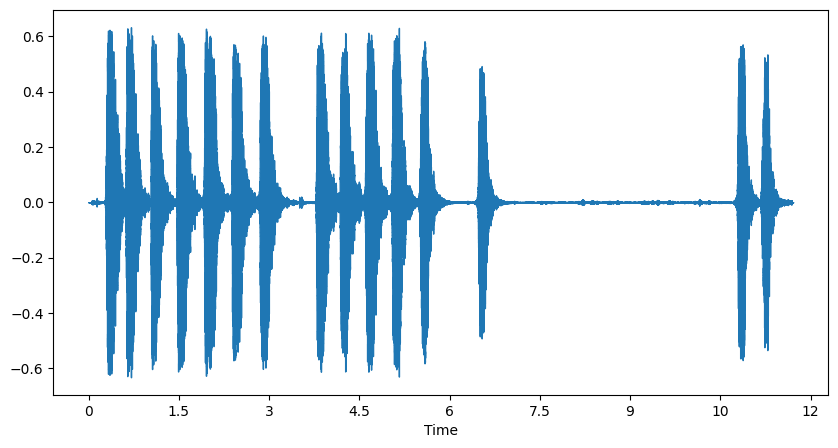

[ 0.0000000e+00 -4.6673655e-12  7.5853325e-12 ...  3.5271142e-09
  1.6170059e-09  3.9274943e-09] 24000


In [53]:
sample_man2="./cats_dogs/dog-barking-103839.mp3"
getPred(sample_man2)
show_playAudio(sample_man2)